# Worldquant University
## 23/09 622 Stochastic Modeling GWP2
## Group 4186



# Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
import yfinance as yf

### Collect crypto tickers

In [2]:
crypto_tickers = ['BTC-USD', 'ETH-USD']

crypto = pd.DataFrame()

for tick in crypto_tickers:
  ydata = yf.download(tick, start = '2019-01-01', end = '2022-12-31')
  crypto[tick] = ydata['Adj Close']

crypto.index = pd.to_datetime(ydata.index, format='%Y%m%d')

crypto.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


BTC-USD     ETH-USD
Date                               
2019-01-01  3843.520020  140.819412
2019-01-02  3943.409424  155.047684
2019-01-03  3836.741211  149.135010
2019-01-04  3857.717529  154.581940
2019-01-05  3845.194580  155.638596

In [3]:
crypto.describe()

BTC-USD      ETH-USD
count   1460.000000  1460.000000
mean   23532.857680  1313.156052
std    17561.500613  1281.337690
min     3399.471680   104.535301
25%     9142.184814   203.814823
50%    17129.605469   734.661774
75%    38713.802734  2162.123413
max    67566.828125  4812.087402

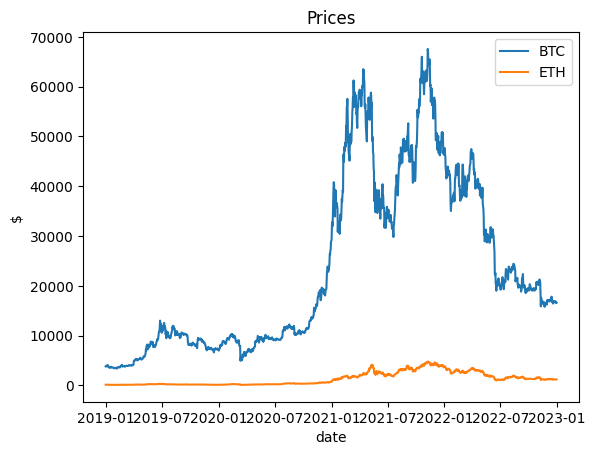

In [4]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot the data
ax.plot(crypto['BTC-USD'], label='BTC')
ax.plot(crypto['ETH-USD'], label='ETH')

# naming
ax.set_xlabel('date')
ax.set_ylabel('$')
ax.set_title("Prices")
ax.legend()

# Display the figure.
plt.show()

In [5]:
crypto_returns = crypto.pct_change(axis=0) # daily returns
crypto_returns

BTC-USD   ETH-USD
Date                          
2019-01-01       NaN       NaN
2019-01-02  0.025989  0.101039
2019-01-03 -0.027050 -0.038135
2019-01-04  0.005467  0.036523
2019-01-05 -0.003246  0.006836
...              ...       ...
2022-12-26  0.004620  0.006573
2022-12-27 -0.011976 -0.011559
2022-12-28 -0.009846 -0.018804
2022-12-29  0.005423  0.009756
2022-12-30 -0.002389 -0.001966

[1460 rows x 2 columns]

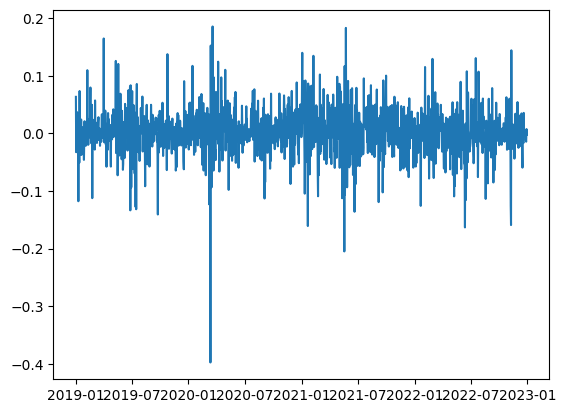

In [6]:

plt.plot(crypto_returns.index, crypto_returns.mean(axis=1))
plt.show()

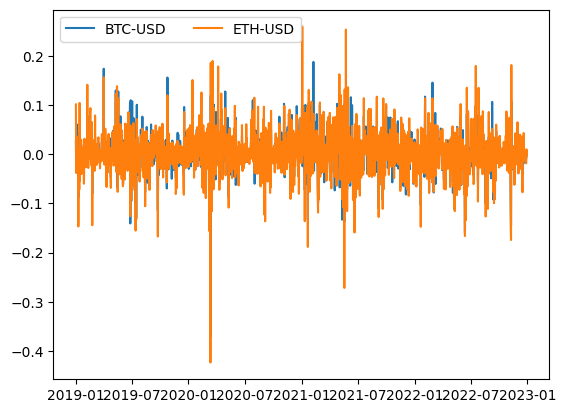

In [7]:
plt.plot(crypto_returns.index, crypto_returns)
plt.legend(crypto_tickers, loc='upper left', ncol=3)
plt.show()

### Collect index tickers

In [8]:
index_tickers = ['^GSPC', '^IXIC']

indices = pd.DataFrame()

for tick in index_tickers:
  ydata = yf.download(tick, start = '2019-01-01', end = '2022-12-31')
  indices[tick] = ydata['Adj Close']

indices.index = pd.to_datetime(ydata.index, format='%Y%m%d')


indices.head()




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


^GSPC        ^IXIC
Date                                
2019-01-02  2510.030029  6665.939941
2019-01-03  2447.889893  6463.500000
2019-01-04  2531.939941  6738.859863
2019-01-07  2549.689941  6823.470215
2019-01-08  2574.409912  6897.000000

In [9]:
indices.describe()

^GSPC         ^IXIC
count  1008.000000   1008.000000
mean   3624.904483  11184.147952
std     634.328208   2630.880711
min    2237.399902   6463.500000
25%    3005.232483   8518.844971
50%    3678.189941  11187.955078
75%    4180.419922  13539.997559
max    4796.560059  16057.440430

In [10]:
indices_returns = indices.pct_change(axis=0) # daily returns
indices_returns = indices_returns.dropna()
indices_returns

^GSPC     ^IXIC
Date                          
2019-01-03 -0.024757 -0.030369
2019-01-04  0.034336  0.042602
2019-01-07  0.007010  0.012556
2019-01-08  0.009695  0.010776
2019-01-09  0.004098  0.008711
...              ...       ...
2022-12-23  0.005868  0.002075
2022-12-27 -0.004050 -0.013777
2022-12-28 -0.012021 -0.013517
2022-12-29  0.017461  0.025927
2022-12-30 -0.002541 -0.001108

[1007 rows x 2 columns]

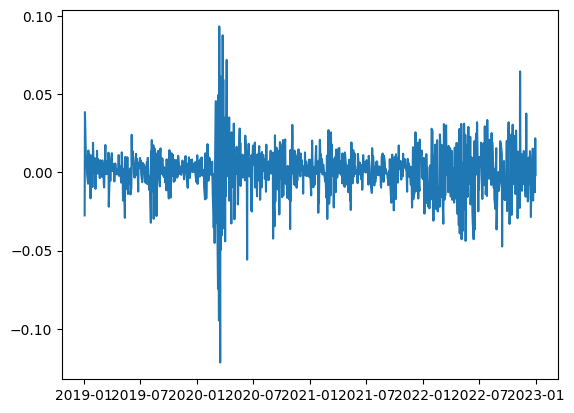

In [11]:
plt.plot(indices_returns.index, indices_returns.mean(axis=1))
plt.show()

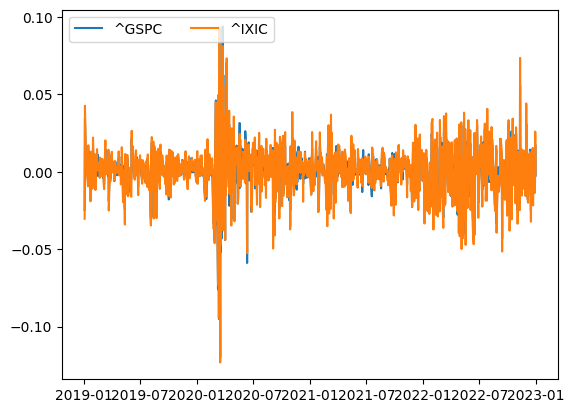

In [12]:
plt.plot(indices_returns.index, indices_returns)
plt.legend(index_tickers, loc='upper left', ncol=3)
plt.show()

### Collect currency tickers

In [13]:
currency_tickers = ['EURUSD=X', 'GBPJPY=X', 'CADUSD=X']

currencies = pd.DataFrame()

for tick in currency_tickers:
  ydata = yf.download(tick, start = '2019-01-01', end = '2022-12-31')
  currencies[tick] = ydata['Adj Close']


currencies.index = pd.to_datetime(ydata.index, format='%Y%m%d')
currencies.columns = [['EURUSD', 'GBPJPY', 'CADUSD']]

currencies.head()




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


EURUSD      GBPJPY    CADUSD
Date                                      
2019-01-01  1.149306  139.600006  0.746586
2019-01-02  1.146171  139.858002  0.733923
2019-01-03  1.131811  134.483994  0.733611
2019-01-04  1.139108  136.141006  0.741906
2019-01-07  1.141044  138.182999  0.747982

In [14]:
currencies.describe()

EURUSD       GBPJPY       CADUSD
count  1043.000000  1043.000000  1043.000000
mean      1.124730   147.278955     0.766809
std       0.059639    10.907987     0.026508
min       0.959619   125.961998     0.689741
25%       1.096263   138.264000     0.749963
50%       1.125885   145.481995     0.763068
75%       1.176516   155.070000     0.787730
max       1.234111   171.376007     0.830703

In [15]:
currencies_returns = currencies.pct_change(axis=0) # daily returns
currencies_returns

EURUSD    GBPJPY    CADUSD
Date                                    
2019-01-01       NaN       NaN       NaN
2019-01-02 -0.002728  0.001848 -0.016961
2019-01-03 -0.012529 -0.038425 -0.000425
2019-01-04  0.006447  0.012321  0.011307
2019-01-07  0.001700  0.014999  0.008190
...              ...       ...       ...
2022-12-26  0.006081  0.009918  0.003466
2022-12-27 -0.002586 -0.003102  0.002412
2022-12-28 -0.000287  0.000723  0.002366
2022-12-29 -0.000744  0.004243 -0.005471
2022-12-30  0.002964 -0.006030  0.003498

[1043 rows x 3 columns]

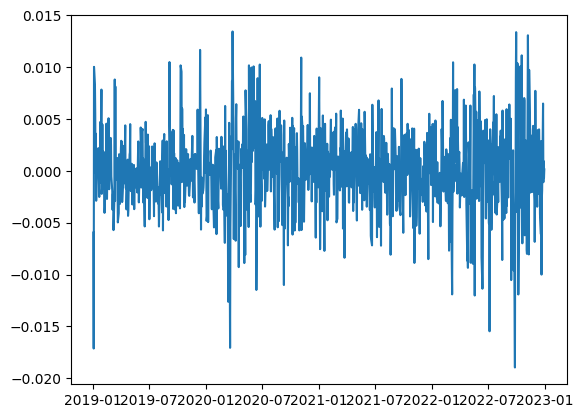

In [16]:
plt.plot(currencies_returns.index, currencies_returns.mean(axis=1))
plt.show()

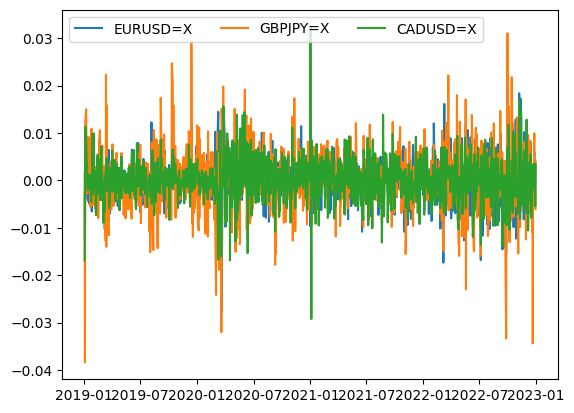

In [17]:
plt.plot(currencies_returns.index, currencies_returns)
plt.legend(currency_tickers, loc='upper left', ncol=3)
plt.show()

# Part 2

### a. Dispersion of the returns

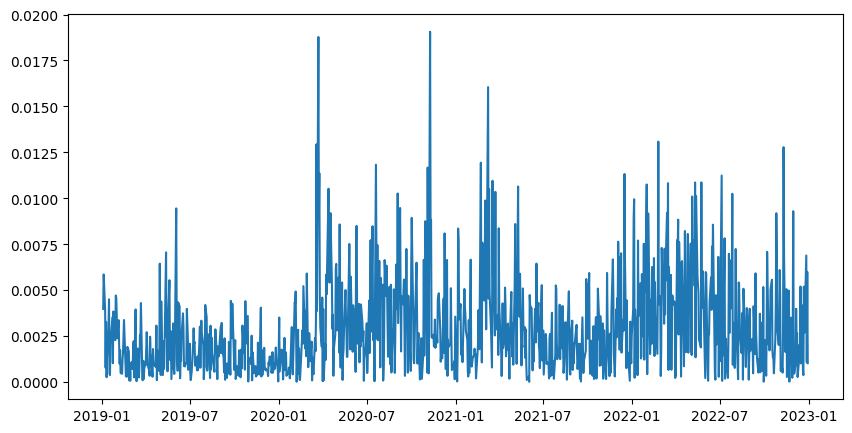

In [18]:
df = indices_returns.std(axis=1)
df = df.dropna(axis=0)
plt.figure(figsize=(10,5))
plt.plot(df.index, df)
plt.show()

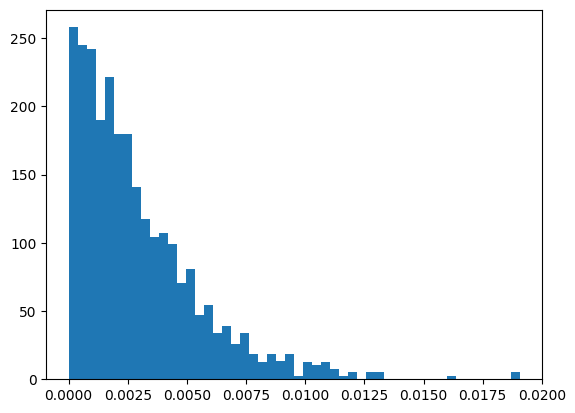

In [19]:
count, bins, ignored = plt.hist(df, 50, density=True)
plt.show()

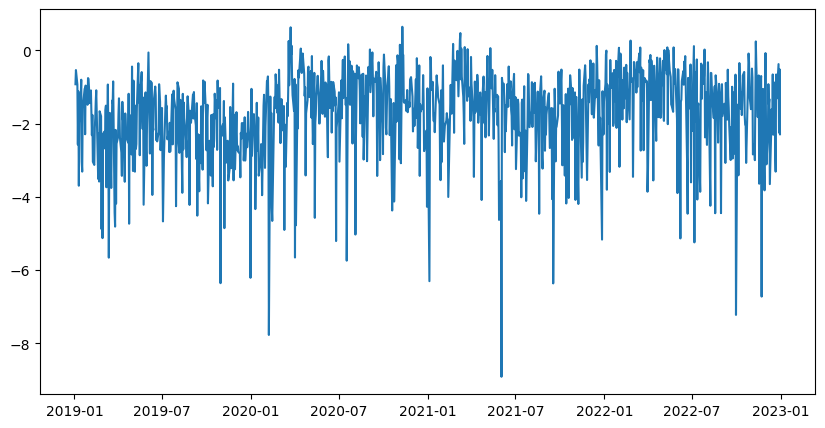

In [20]:
df= np.log(100*df)
plt.figure(figsize=(10,5))
plt.plot(df.index, df)
plt.show()

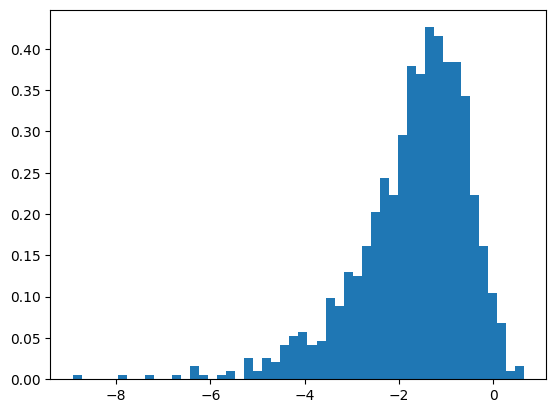

In [21]:
count, bins, ignored = plt.hist(df, 50, density=True)
plt.show()

Define the cross-sectional dispersion in crypto returns as:

𝒀t = et

where et follows a normal distribution with mean μi and variance σ2i. The realization of the vector {μi,σi} depends itself on the realization of a Hidden Markov process.

### Define functions

In [22]:
# likelihood of an estimation
def likelihood(xi_prob, mu, sigma, y):
  phi = norm.pdf((y-mu)/sigma)/sigma
  y_like=np.dot(xi_prob, phi)
  return y_like, phi

In [23]:
# Hamilton filtering correction
def forward_alg(pi0, N, T, P, mu, sigma, Y):
    # pi0: initial distribution
    # N: number of states in the Markov process
    # T: Length of time series
    # mu: expected realizations of random variables
    # sigma: volatilities of realizations of random variable
    # Y: time series
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like, phi = likelihood(pi0, mu, sigma, Y[0])
    # xi_1|1
    xi_prob_t[0,:] = np.multiply(pi0, phi) / y_like
    # xi_2|1
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])
    # Case t > 1
    for tt in range(1, T):
        y_like, phi = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])

        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1

In [24]:
# Kim filtering
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P):
    xi_prob_T = np.zeros((T, N))

    #xi_T|t <-- last element computed in Forward algorith
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]

    #xi_t|T
    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T  # , xi_prob_T1

### b. Estimate a Markov-regime switching model for the selected financial time series. Estimate the model under different assumptions:

#### i) Different number of states N

In [25]:
# Initialize parameters
T = len(df) # length of time-series
N = 4 # Number of states

# SET INITIAL GUESSES

mu_hat0 = [-0.1, 0, 0.5, 1] * np.ones((N))         #expectation parameters of the distribution
sigma_hat0 = [0.1, 0.1, 0.1, 0.1] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 0.15
P_hat0[0, 2] = 0.1
P_hat0[0, 3] = 0

P_hat0[1, 0] = 0.1
P_hat0[1, 1] = 0.75
P_hat0[1, 2] = 0.1
P_hat0[1, 3] = 0.05

P_hat0[2, 0] = 0.05
P_hat0[2, 1] = 0.1
P_hat0[2, 2] = 0.75
P_hat0[2, 3] = 0.1

P_hat0[3, 0] = 0
P_hat0[3, 1] = 0.1
P_hat0[3, 2] = 0.15
P_hat0[3, 3] = 0.75

In [26]:
# Ster as initial probability the stationary distribution
pi_hat0 = [0.5, 0.5, 0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

#### ii. Allowing the expected realization of the time series to differ across states (different “mus”), but with constant variance (same “sigma”).


In [27]:
# Initialize parameters
T = len(df) # length of time-series
N = 2 # Number of states

# SET INITIAL GUESSES

mu_hat0 = [2, 4] * np.ones((N))         #expectation parameters of the distribution
sigma_hat0 = 0.1

In [28]:
def M_step_func_v2(xi_prob, P, N, T, Y):

    # Initialize estimates
    mu_hat = np.zeros((N))
    sigma_hat = 0 #np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
       # New estimates for "mu"
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        # New estimates for "sigma"
        sigma_hat += xi_y_mu2

      # New estimates for transition matrix
        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])
        pi_hat[ss] = xi_prob[0,ss]

      # New estimatiion for initial probabilities
        sigma_hat = np.sqrt(sigma_hat/T)

    return mu_hat, sigma_hat, P_hat, pi_hat

#### iii. Allowing the variance of the time series to change across states (different “sigmas”), but with constant expectation (same “mu”).

In [29]:
# Initialize parameters
T = len(df) # length of time-series
N = 2 # Number

# SET INITIAL GUESSES

mu_hat0 = 0      #expectation parameters of the distribution
sigma_hat0 = [0.1, 0.1] * np.ones((N))

In [30]:
def M_step_func_v3(xi_prob, sigma_hat_prev, P, N, T, Y):
    # Initialize estimates

    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    xi_y_sigma = np.zeros((N))
    xi_sigma = np.zeros((N))

    for ss in range(0, N):
       # New estimates for "mu"
        xi_y_sigma[ss] = np.dot(xi_prob[:, ss], Y)/sigma_hat_prev[ss]
        xi_sigma[ss] = np.sum(xi_y_sigma)/np.sum(xi_sigma)
    mu_hat = np.sum(xi_y_sigma) / np.sum(xi_sigma)

    for ss in range(0, N):
      # New estimates for "sigma"
        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

      # New estimates for transition matrix
        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])
        pi_hat[ss] = xi_prob[0, ss]   # New estimatiion for initial probabilities

    return mu_hat, sigma_hat, P_hat, pi_hat

#### iv. Allowing for different expectations and variances across states.

In [31]:
# Initialize parameters
T = len(df) # length of time-series
N = 2 # Number of states

# SET INITIAL GUESSES

mu_hat0 = [2, 4] * np.ones((N))         #expectation parameters of the distribution
sigma_hat0 = [0.1, 0.1] * np.ones((N))

In [32]:
def M_step_func_v4(xi_prob, P, N, T, Y):
    # Initialize estimates
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    xi_y_sigma = np.zeros((N))
    xi_sigma = np.zeros((N))

    for ss in range(0, N):
       # New estimates for "mu"
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])
      # New estimates for "sigma"
        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

      # New estimates for transition matrix
        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])
        pi_hat[ss] = xi_prob[0, ss]   # New estimatiion for initial probabilities

    return mu_hat, sigma_hat, P_hat, pi_hat

# STEP 3

### Define a function that calculate the likelihood probability

In [33]:
def log_likelihood2(xi_prob, T, pi_hat0, P, mu, sigma, Y):
  y_like = np.zeros(T)
  for tt in range (0,T):
    y_like[tt], _ = likelihood(xi_prob[tt,:], mu, sigma, Y[tt])

  sum_log_like = np.sum(np.log(y_like))
  k = (np.prod(mu.shape) + np.prod(sigma.shape))
  k += (np.prod(pi_hat0.shape) + np.prod(P.shape))
  n = len(Y)
  akaike = 2 * k - 2 * sum_log_like
  schwarz = k * np.log(n) - 2 * sum_log_like
  return sum_log_like, akaike, schwarz

### Estimate the model parameters for same sigma different mus

[-1. -2.] [0.5 0.5] [[0.75 0.25]
 [0.3  0.7 ]] [0.54545455 0.45454545]



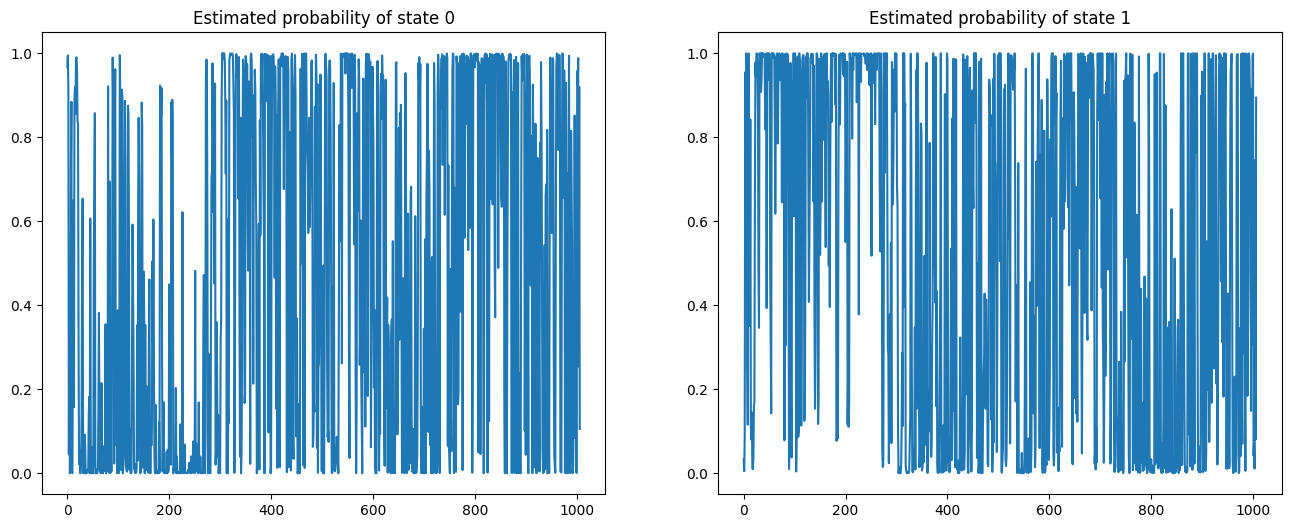


Iteration:  0
Log-Likelihood:  -2447.5692 Change:  1.0
[-0.89684131 -2.48894476] 0.8089707946939014 [[0.7005503  0.2994497 ]
 [0.27862145 0.72137855]] [0.96696903 0.03303097]



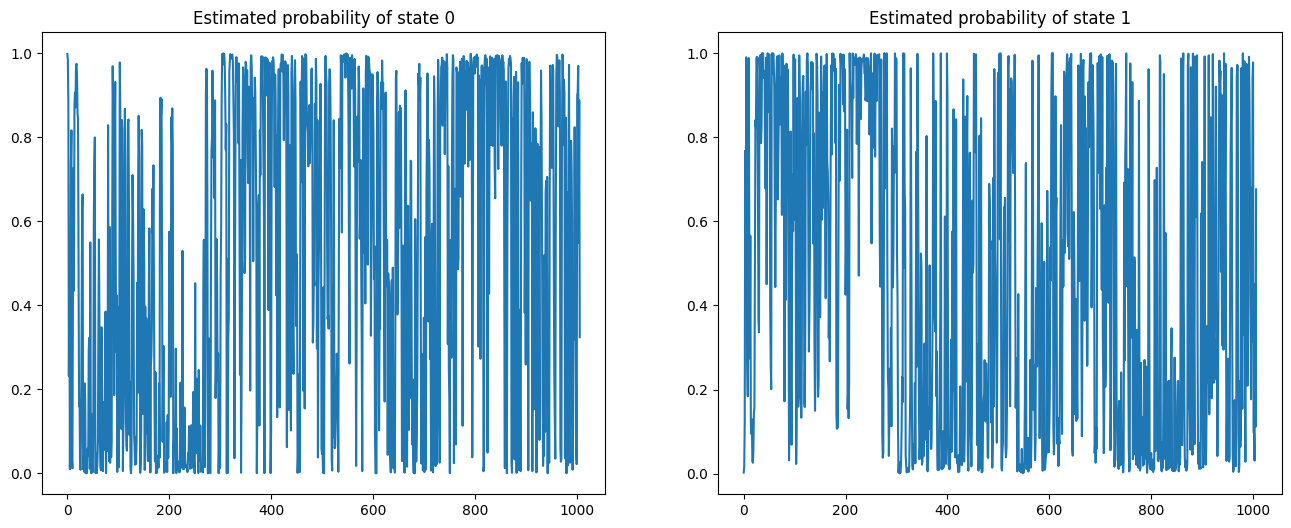


Iteration:  1
Log-Likelihood:  -1651.1141 Change:  0.3254
[-1.02179855 -2.5344891 ] 0.8028927032821297 [[0.74009056 0.25990944]
 [0.30215613 0.69784387]] [0.99774394 0.00225606]



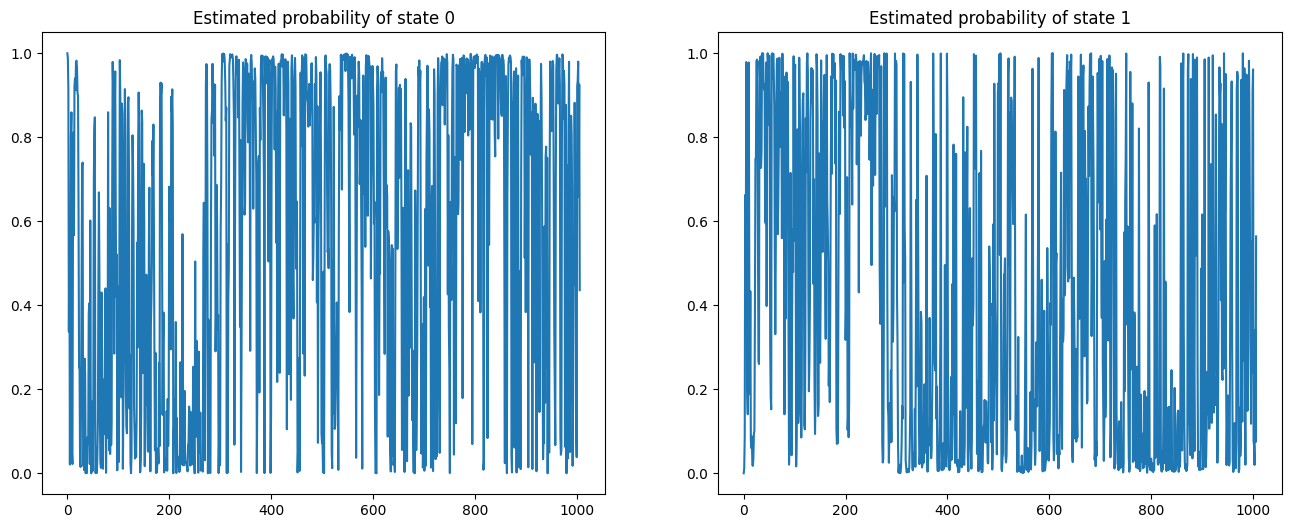


Iteration:  2
Log-Likelihood:  -1636.5578 Change:  0.0088
[-1.07916571 -2.62668355] 0.7695908518049503 [[0.7683363 0.2316637]
 [0.3267784 0.6732216]] [9.99867752e-01 1.32247706e-04]



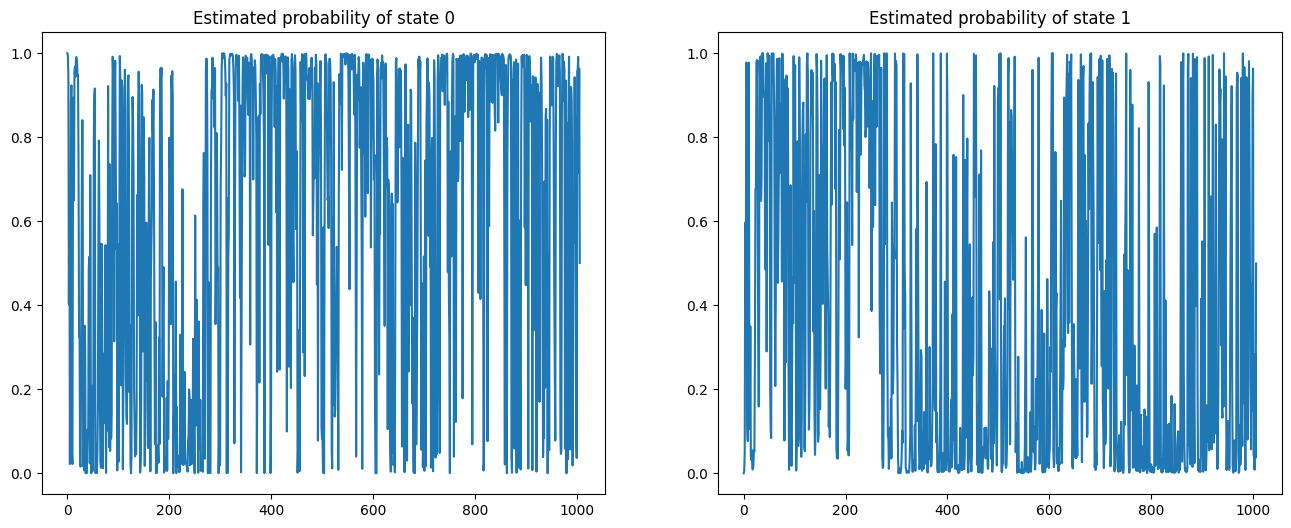


Iteration:  3
Log-Likelihood:  -1638.8315 Change:  -0.0014
Final Estimates
Log-Likelihood:  -1638.8315 Akaike:  3295.663 Schwarz:  3339.8956
Mu:  [-1.0792 -2.6267]
Sigma:  0.7696
Transition matrix: 
[0.7683 0.2317]
[0.3268 0.6732]
Initial probabilities: [9.999e-01 1.000e-04]


In [34]:
# Initialize parameters
T = len(df) # length of time-series
N = 2 # Number

# SET INITIAL GUESSES

mu_hat0 = [-1, -2] * np.ones((N))         #expectation parameters of the distribution
sigma_hat0 = [0.5, 0.5] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.7
P_hat0[1, 0] = 1 - P_hat0[1, 1]

# Ster as initial probability the stationary distribution
pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

    # Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200    #number of steps
itetol = 1e-4   #convergence tolerance parameter
log_like0 = -1e8
for ite in range(0, itemax):
    print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # Expectation step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0
    )

    print("")
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated probability of state 0")
    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated probability of state 1")
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.show()
    print("")

        # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )

    # Instead of checking estimates we only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])),
                                            T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df)
    diff = (log_like1 - log_like0)/abs(log_like0 + 1e-3)
    print("Iteration: ", ite)
    print("Log-Likelihood: ", np.round(log_like1, 4), "Change: ", np.round(diff,4))

    # Stop when the difference in likelihood between steps decreases

    if diff > itetol :
        # M-step
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func_v2(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        print("Final Estimates")
        print("Log-Likelihood: ", np.round(log_like1,4),
          "Akaike: ", np.round(akaike,4),
          "Schwarz: ", np.round(schwarz,4))
        print("Mu: ", np.round(mu_hat0,4))
        print("Sigma: ", np.round(sigma_hat0,4))
        print("Transition matrix: ")
        for ss in range(N):
          print(np.round(P_hat0[ss,:],4))
        print("Initial probabilities:", np.round(pi_hat0,4))
        break

### Estimate the model parameters for different sigma same mus

[-1. -2.] [0.5 0.5] [[0.75 0.25]
 [0.3  0.7 ]] [0.54545455 0.45454545]



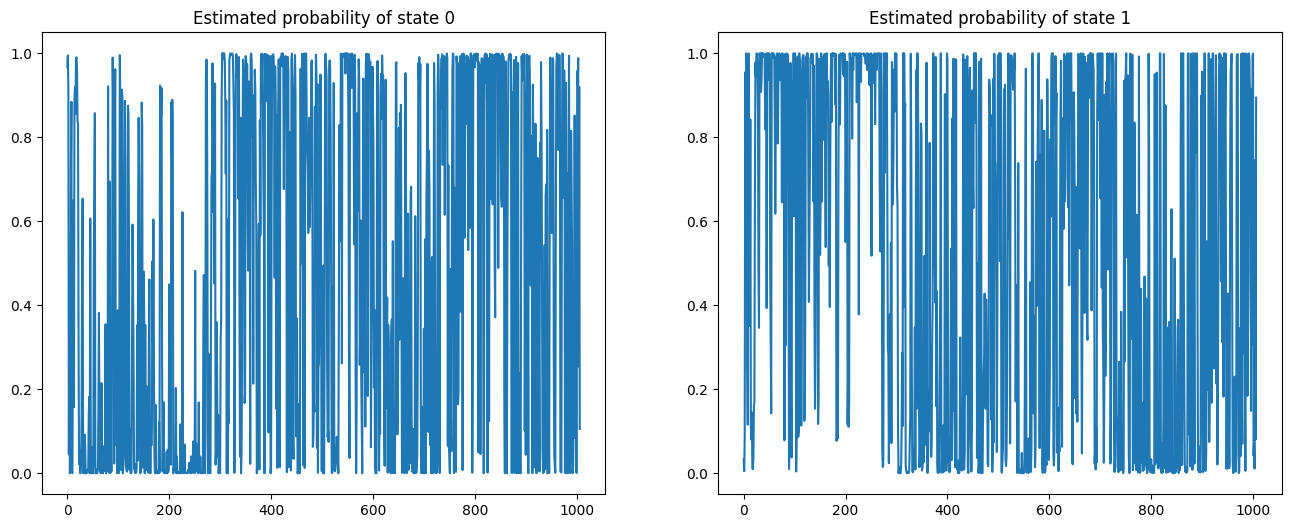


Iteration:  0
Log-Likelihood:  -2447.5692 Change:  1.0
0.0 [1.04564117 2.73133295] [[0.7005503  0.2994497 ]
 [0.27862145 0.72137855]] [0.96696903 0.03303097]


<ipython-input-30-85de5dfb54d5>:14: RuntimeWarning: divide by zero encountered in double_scalars
  xi_sigma[ss] = np.sum(xi_y_sigma)/np.sum(xi_sigma)


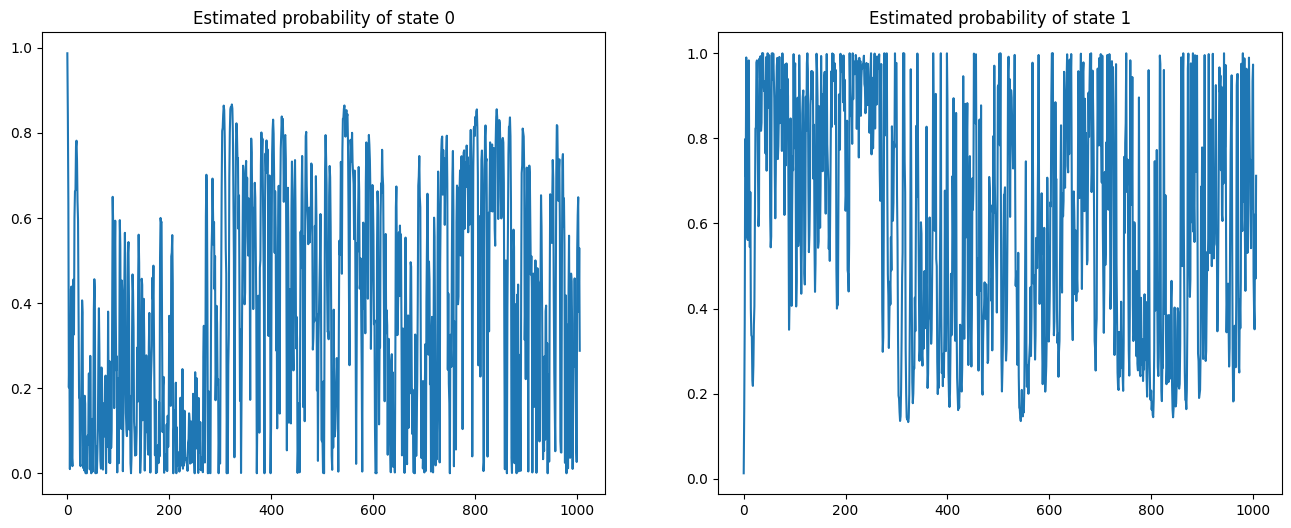


Iteration:  1
Log-Likelihood:  -2221.4357 Change:  0.0924
0.0 [1.24047547 2.4958693 ] [[0.66377504 0.33622496]
 [0.21693588 0.78306412]] [0.9872404 0.0127596]



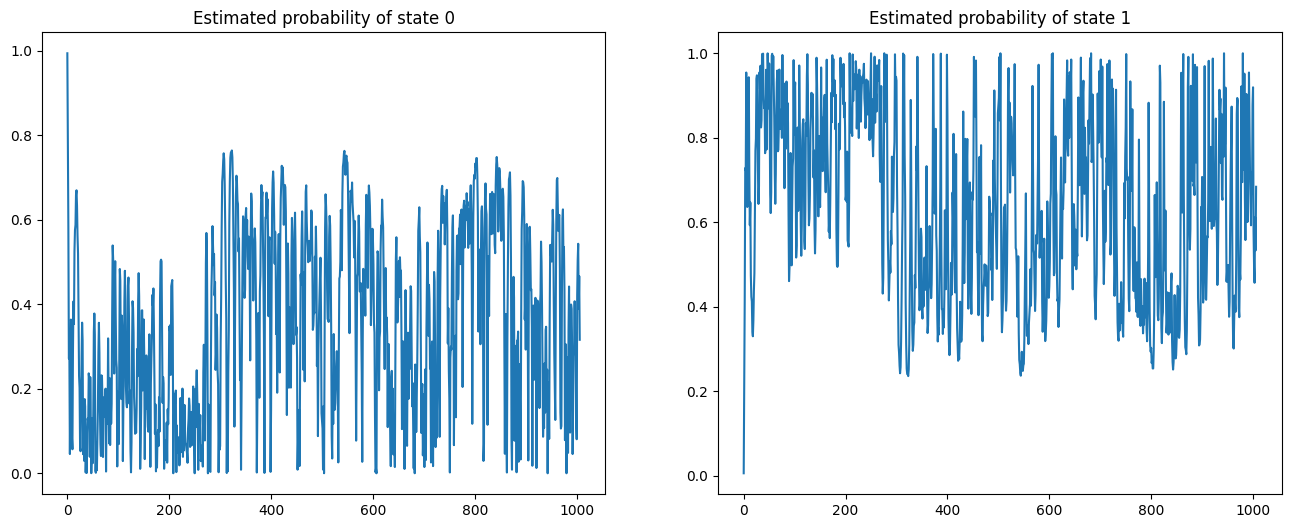


Iteration:  2
Log-Likelihood:  -2185.49 Change:  0.0162
0.0 [1.35937525 2.41128623] [[0.65735869 0.34264131]
 [0.19213371 0.80786629]] [0.99415341 0.00584659]



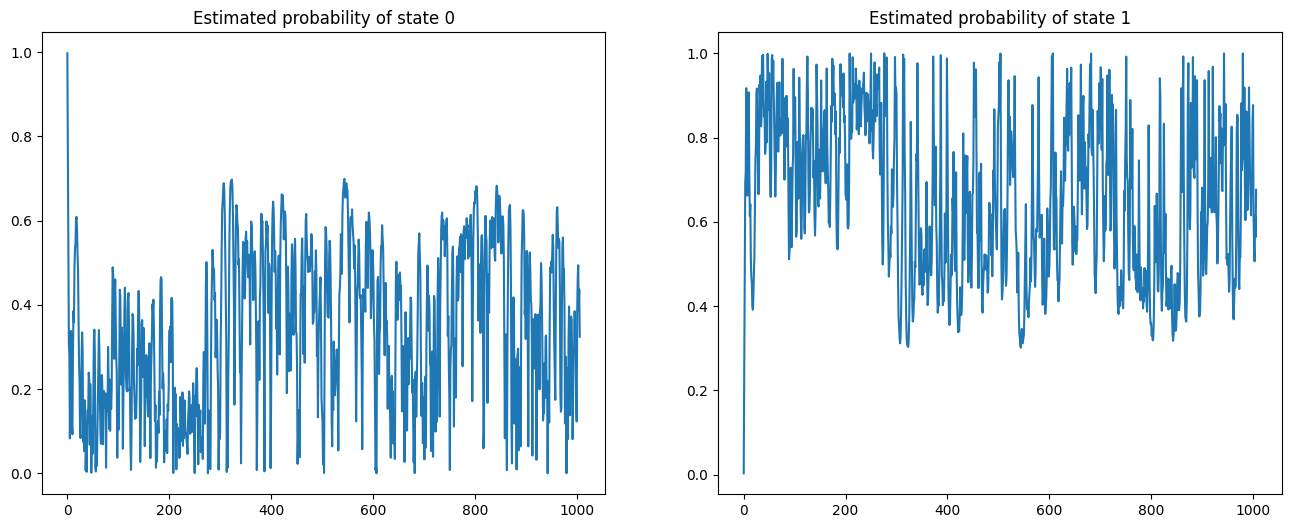


Iteration:  3
Log-Likelihood:  -2177.2694 Change:  0.0038
0.0 [1.4388722  2.36759205] [[0.65933319 0.34066681]
 [0.17875342 0.82124658]] [0.99702998 0.00297002]



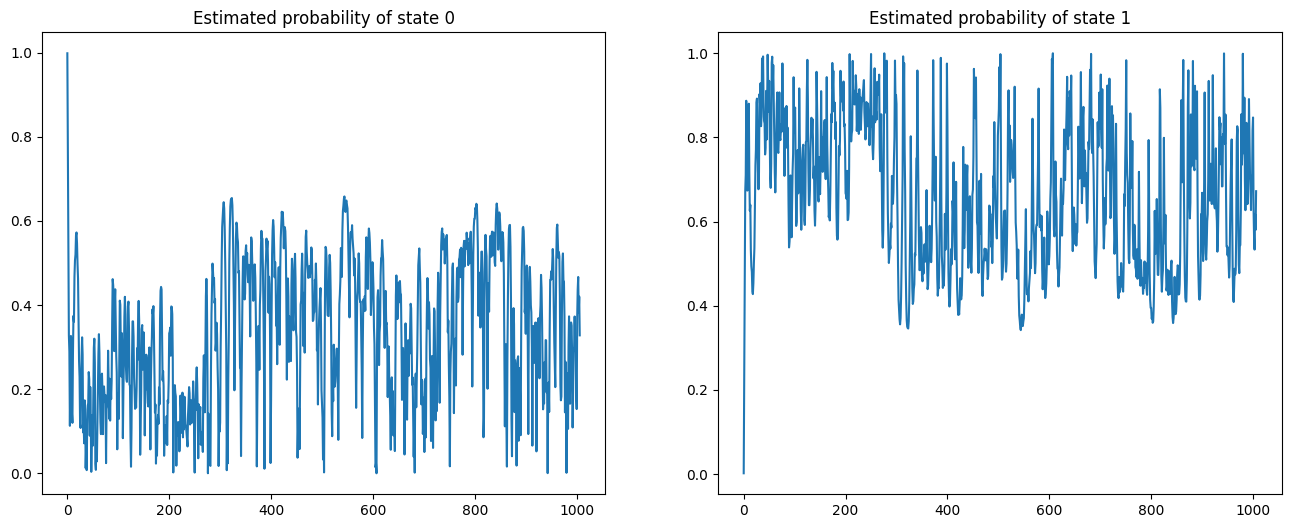


Iteration:  4
Log-Likelihood:  -2174.332 Change:  0.0013
0.0 [1.49453004 2.34126581] [[0.66423843 0.33576157]
 [0.1702678  0.8297322 ]] [0.99838479 0.00161521]



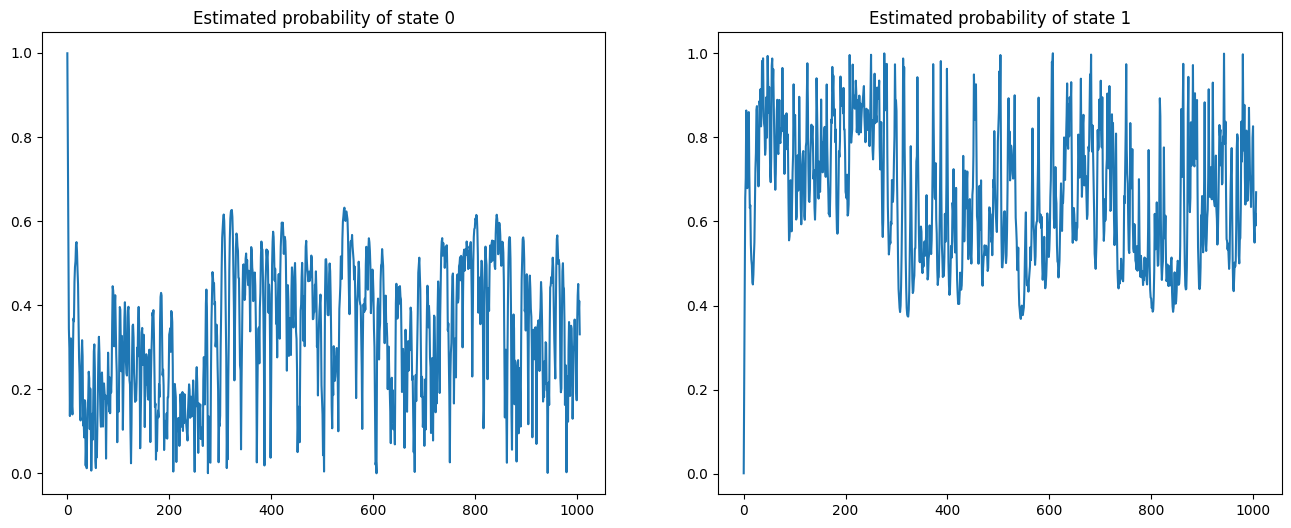


Iteration:  5
Log-Likelihood:  -2173.0186 Change:  0.0006
0.0 [1.53453007 2.32417132] [[0.67028357 0.32971643]
 [0.16427205 0.83572795]] [9.99079194e-01 9.20805974e-04]



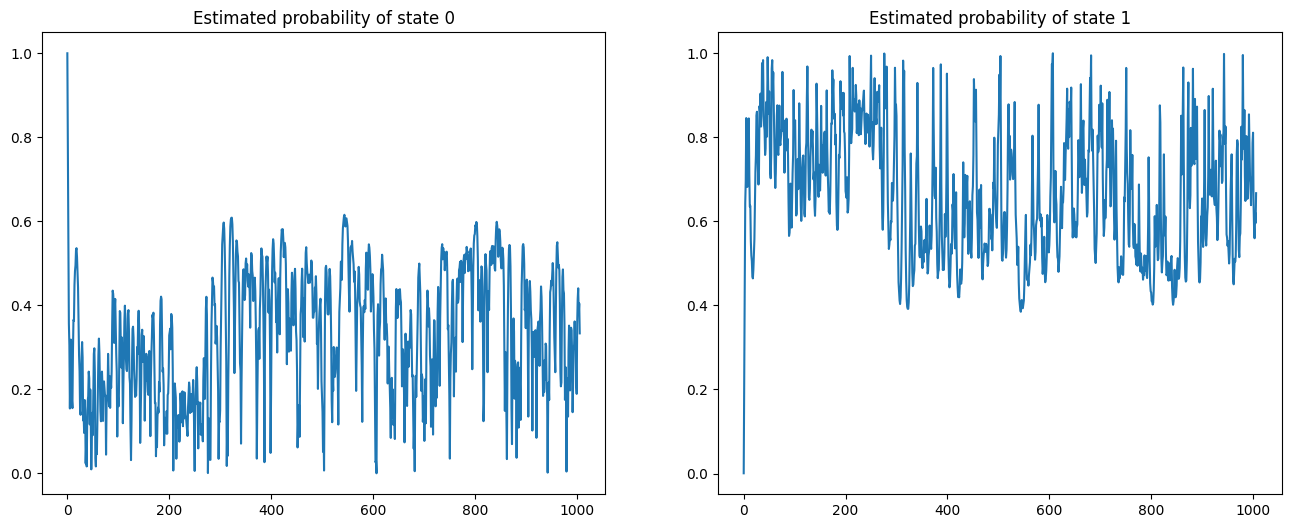


Iteration:  6
Log-Likelihood:  -2172.3393 Change:  0.0003
0.0 [1.56369077 2.31268673] [[0.67679479 0.32320521]
 [0.15968318 0.84031682]] [9.99457264e-01 5.42736084e-04]



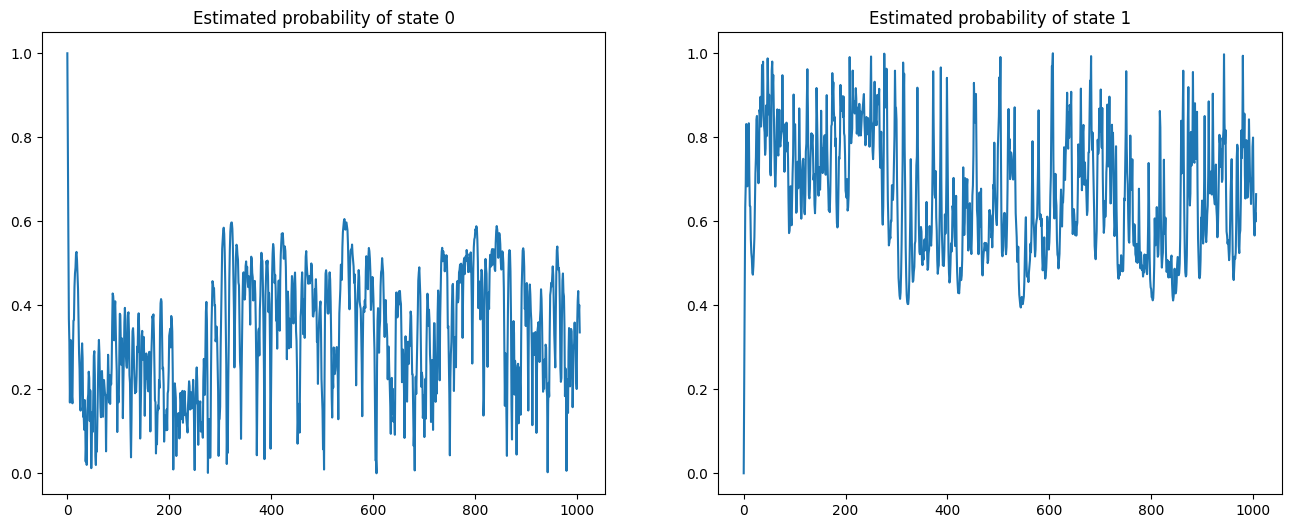


Iteration:  7
Log-Likelihood:  -2171.9448 Change:  0.0002
0.0 [1.58505817 2.30492471] [[0.68350379 0.31649621]
 [0.15594507 0.84405493]] [9.99672394e-01 3.27606134e-04]



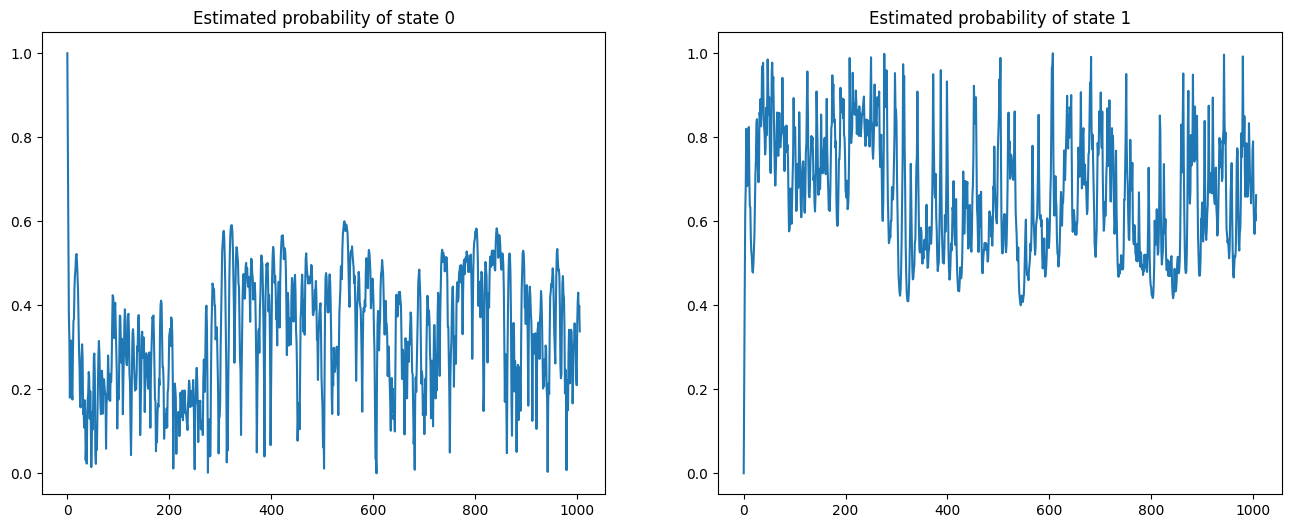


Iteration:  8
Log-Likelihood:  -2171.69 Change:  0.0001
0.0 [1.60065423 2.29979122] [[0.69030594 0.30969406]
 [0.15274345 0.84725655]] [9.99798868e-01 2.01132285e-04]



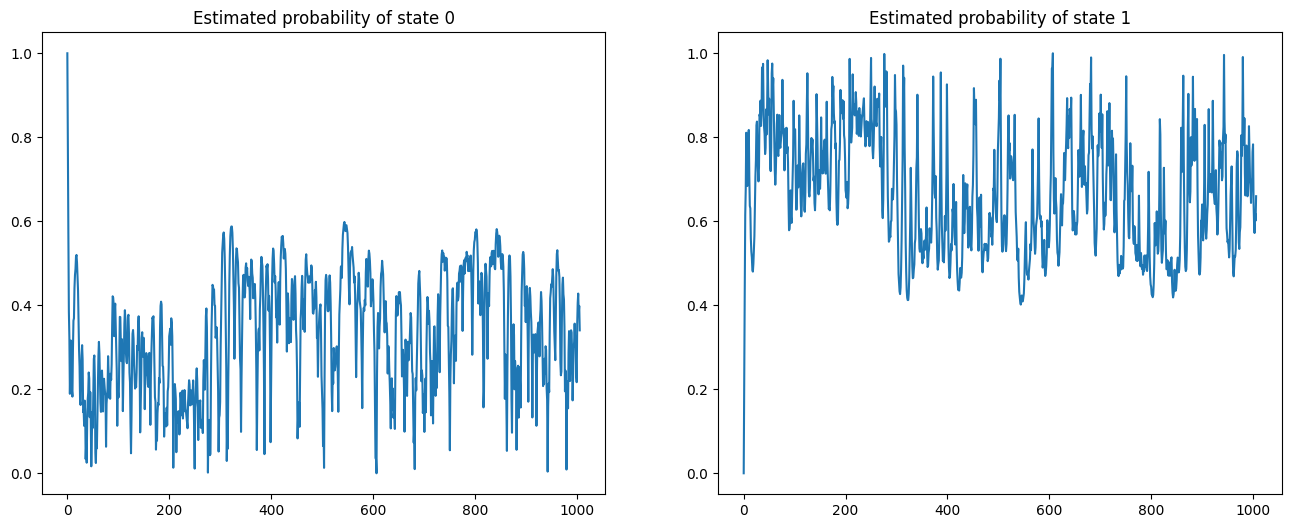


Iteration:  9
Log-Likelihood:  -2171.5071 Change:  0.0001
Final Estimates
Log-Likelihood:  -2171.5071 Akaike:  4361.0141 Schwarz:  4405.2467
Mu:  0.0
Sigma:  [1.6007 2.2998]
Transition matrix: 
[0.6903 0.3097]
[0.1527 0.8473]
Initial probabilities: [9.998e-01 2.000e-04]


In [35]:
# Initialize parameters
T = len(df) # length of time-series
N = 2 # Number

# SET INITIAL GUESSES

mu_hat0 = [-1, -2] * np.ones((N))         #expectation parameters of the distribution
sigma_hat0 = [0.5, 0.5] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.7
P_hat0[1, 0] = 1 - P_hat0[1, 1]

# Ster as initial probability the stationary distribution
pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

    # Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200    #number of steps
itetol = 1e-4   #convergence tolerance parameter
log_like0 = -1e8
for ite in range(0, itemax):
    print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # Expectation step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, df
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0
    )

    print("")
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated probability of state 0")
    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated probability of state 1")
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.show()
    print("")

        # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )

    # Instead of checking estimates we only check likelihood
    log_like1, akaike, schwarz = log_likelihood2(np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])),
                                            T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, df)
    diff = (log_like1 - log_like0)/abs(log_like0 + 1e-3)
    print("Iteration: ", ite)
    print("Log-Likelihood: ", np.round(log_like1, 4), "Change: ", np.round(diff,4))

    # Stop when the difference in likelihood between steps decreases

    if diff > itetol :
        # M-step
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func_v3(xi_prob_T, sigma_hat0, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        print("Final Estimates")
        print("Log-Likelihood: ", np.round(log_like1,4),
          "Akaike: ", np.round(akaike,4),
          "Schwarz: ", np.round(schwarz,4))
        print("Mu: ", np.round(mu_hat0,4))
        print("Sigma: ", np.round(sigma_hat0,4))
        print("Transition matrix: ")
        for ss in range(N):
          print(np.round(P_hat0[ss,:],4))
        print("Initial probabilities:", np.round(pi_hat0,4))
        break

# Step 4

#### Model estimation: Hidden Markov Model with an AR(1) process

#### Define functions

Likelihood of an observation

In [36]:
def likelihood_AR1(xi_prob, mu, sigma, rho, y, y_1):
  phi = norm.pdf((y-mu-rho*y_1)/sigma)/sigma
  y_like=np.dot(xi_prob, phi)
  return y_like, phi

In [37]:
# Hamilton filtering
def forward_alg_AR1(pi0, N, T, P, mu, sigma, rho, Y):

    # Y: time series
    xi_prob_t = np.zeros((T-1, N))
    xi_prob_t1 = np.zeros((T-1, N))

    # Case t=1
    # Likelihood of observation y_1 and marginal densities phi_1
    # xi_1|1
    y_like, phi = likelihood_AR1(pi0, mu, sigma, rho, Y[1], Y[0])
   #xi_2|1
    xi_prob_t[0, :] = np.multiply(pi0, phi) / y_like

    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    # case t> 1
    for tt in range(1, T-1):
        # Likelihood of observation y_t and marginal densities phi_t
        y_like,phi = likelihood_AR1(xi_prob_t1[tt - 1, :], mu, sigma, rho, Y[tt+1],Y[tt])
        # xi_t|t
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like

        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1

In [38]:
def M_step_func_AR1(xi_prob, P, N, T, Y):
    # Initialize estimates
    mu_hat = np.zeros((N))
    rho_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
       # New estimates for "mu"
        xi_y = np.sqrt(xi_prob[:, ss])*Y[1:]
        z = np.stack((np.ones(T-1),Y[:-1]),axis=1)
        xi_z = np.zeros((T-1,N))
        xi_z[:,0] = np.sqrt(xi_prob[:, ss])*z[:,0]
        xi_z[:,1] = np.sqrt(xi_prob[:, ss])*z[:,1]
        z_xi_z_inv = np.linalg.inv(np.dot(xi_z.T,xi_z))
        beta_hat = np.dot(z_xi_z_inv, np.dot(xi_z.T,xi_y))

        mu_hat[ss] = beta_hat[0]
        rho_hat[ss] = beta_hat[1]

      # New estimates for "sigma"
        residuals = Y[1:]-np.dot(z,beta_hat)
        xi_y_mu2 = np.dot(xi_prob[:, ss], residuals ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

      # New estimates for transition matrix
        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(P[ss, :, 1:])
      # New estimatiion for initial probabilities
        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, rho_hat , sigma_hat, P_hat, pi_hat

logarithmic likelihood

In [39]:
def log_likelihood_AR1(xi_prob, T, pi_hat0, P, mu, sigma, rho, Y):
  y_like = np.zeros(T-1)
  for tt in range (0,T-1):
    y_like[tt], _ = likelihood_AR1(xi_prob[tt,:], mu, sigma, rho, Y[tt+1], Y[tt])
  sum_log_like = np.sum(np.log(y_like))
  k = (np.prod(mu.shape) + np.prod(sigma.shape) + np.prod(rho.shape))
  k += (np.prod(pi_hat0.shape) + np.prod(P.shape))
  n = len(Y)-1
  akaike = 2 * k - 2 * sum_log_like
  schwarz = k * np.log(n) - 2 * sum_log_like
  return sum_log_like, akaike, schwarz

#### Compute the model

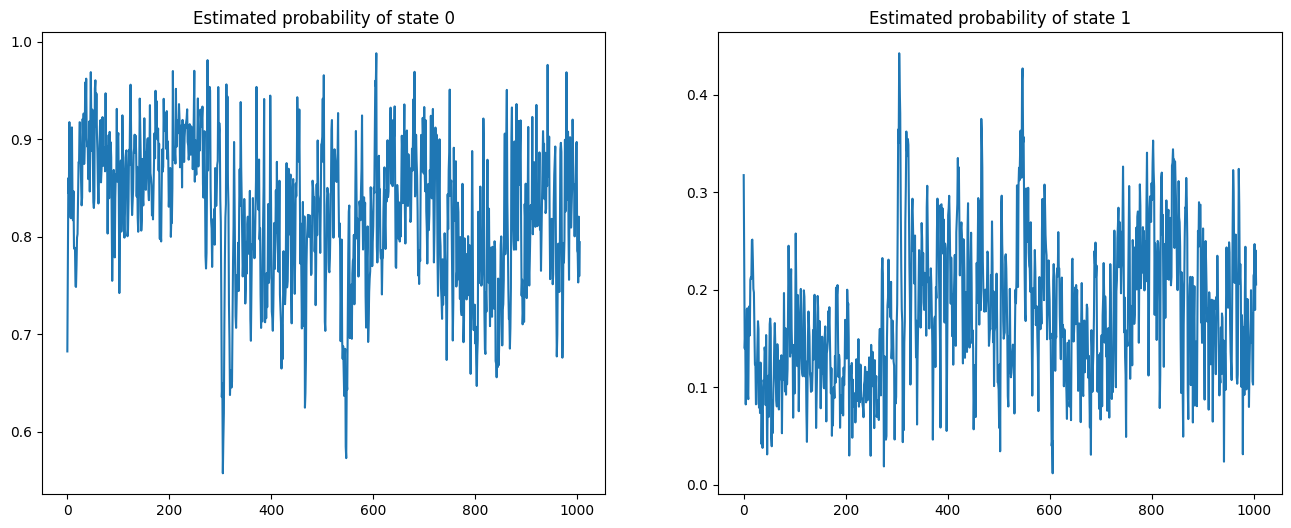


Iteration:  0
Diff:  0.999919441303113
Log-Likelihood:  -8055.8707 Change:  0.9999



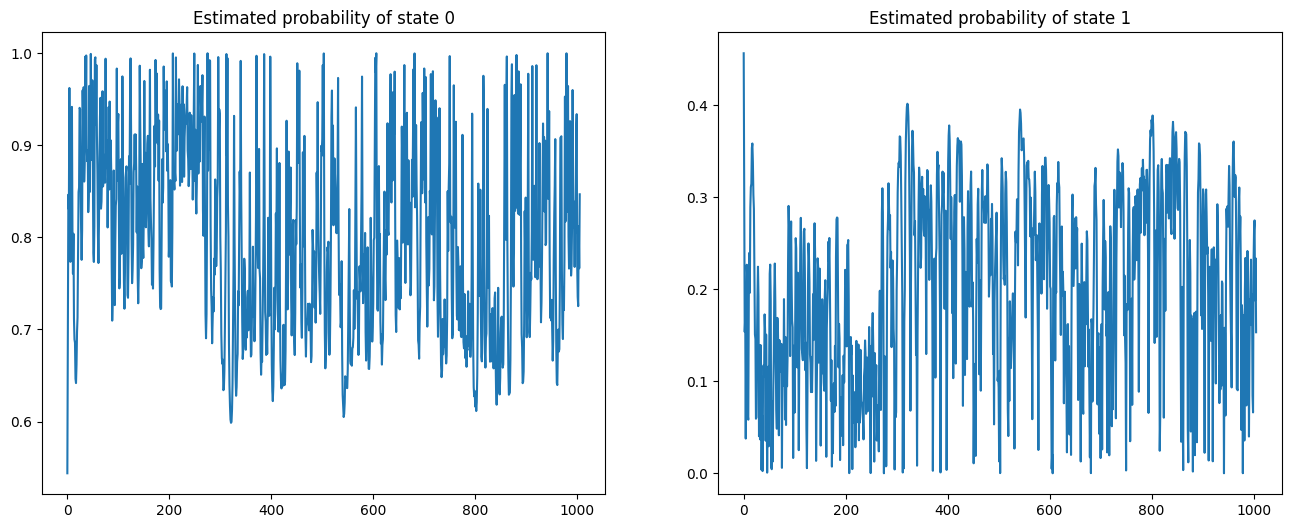


Iteration:  1
Diff:  0.8034010329519496
Log-Likelihood:  -1583.7767 Change:  0.8034



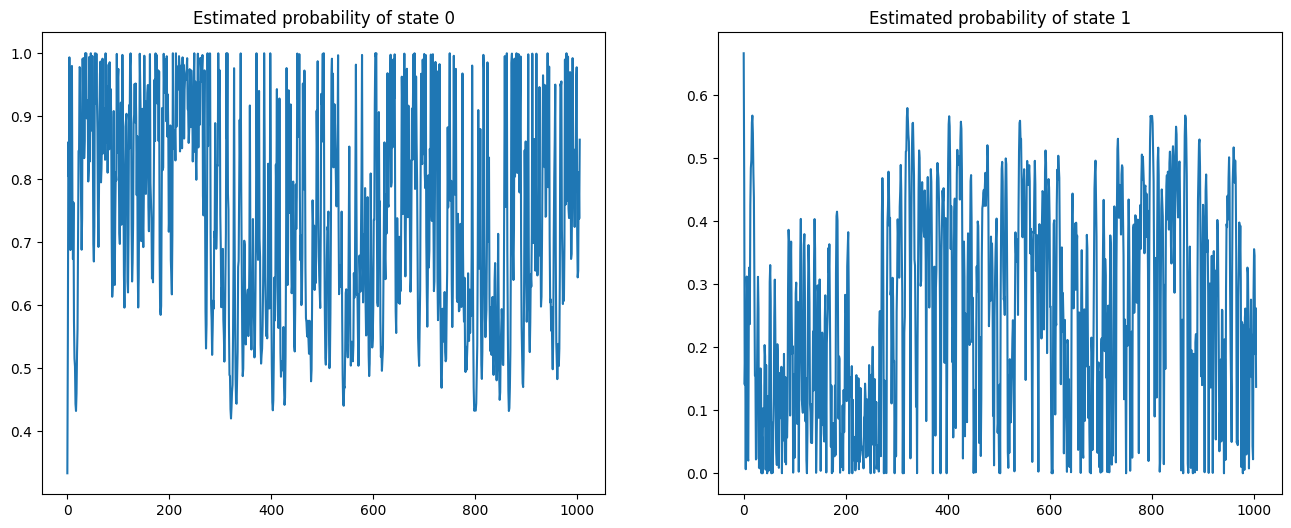


Iteration:  2
Diff:  0.014207733235905668
Log-Likelihood:  -1561.2748 Change:  0.0142



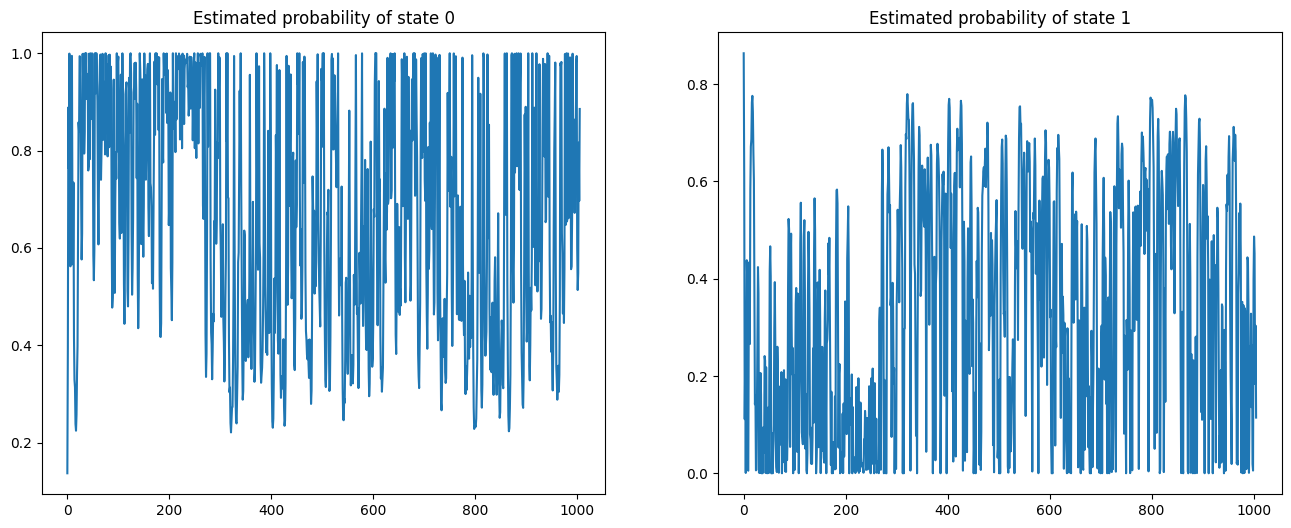


Iteration:  3
Diff:  0.016031698448923548
Log-Likelihood:  -1536.2449 Change:  0.016



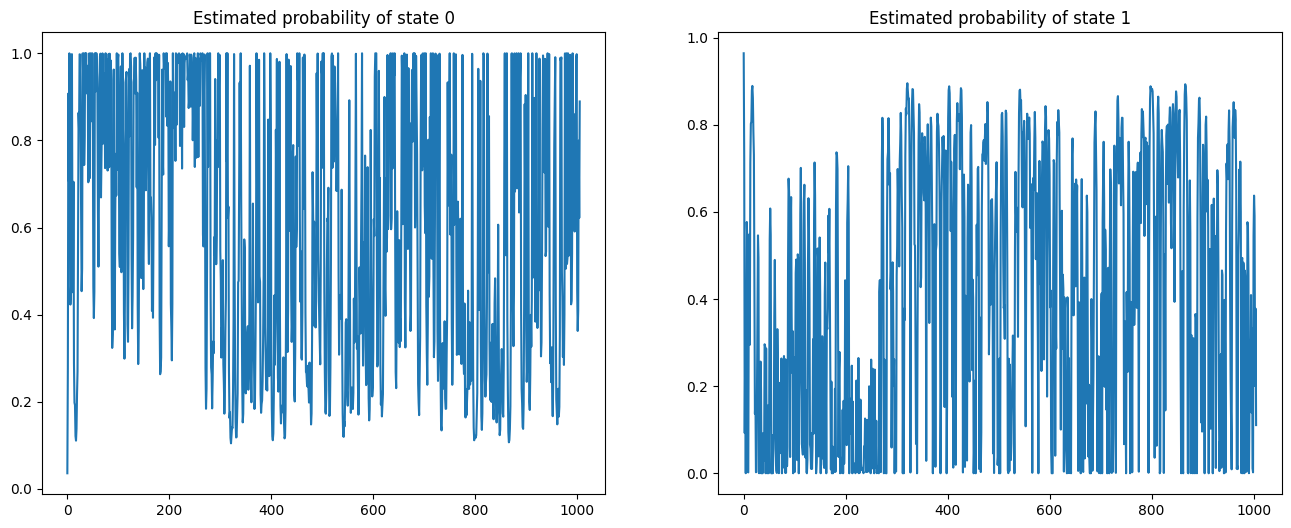


Iteration:  4
Diff:  0.011039004857269564
Log-Likelihood:  -1519.2863 Change:  0.011



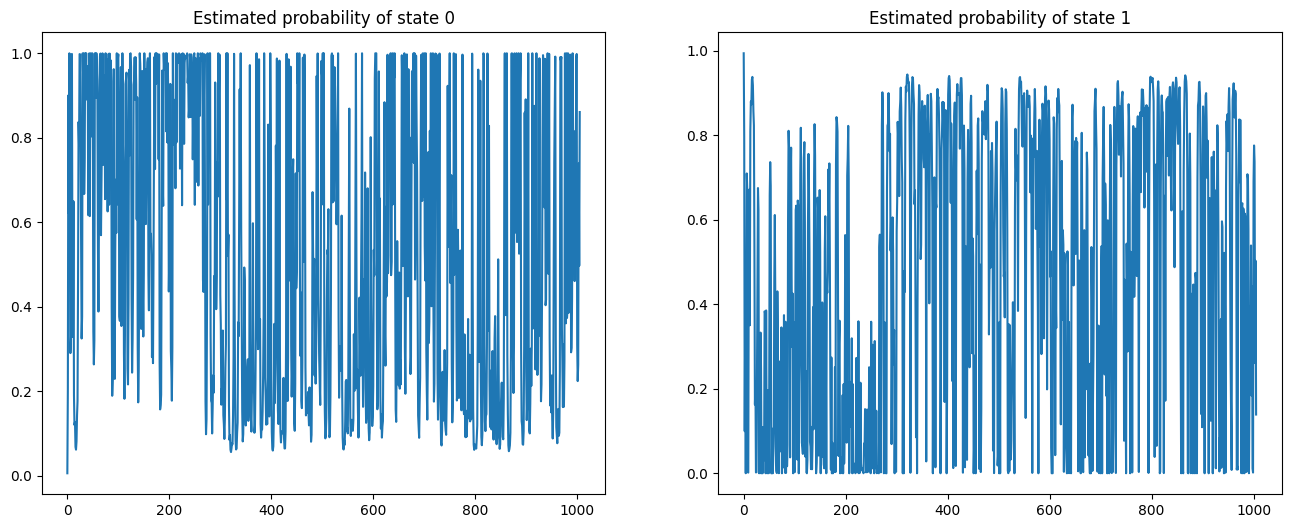


Iteration:  5
Diff:  0.002794285790157826
Log-Likelihood:  -1515.041 Change:  0.0028



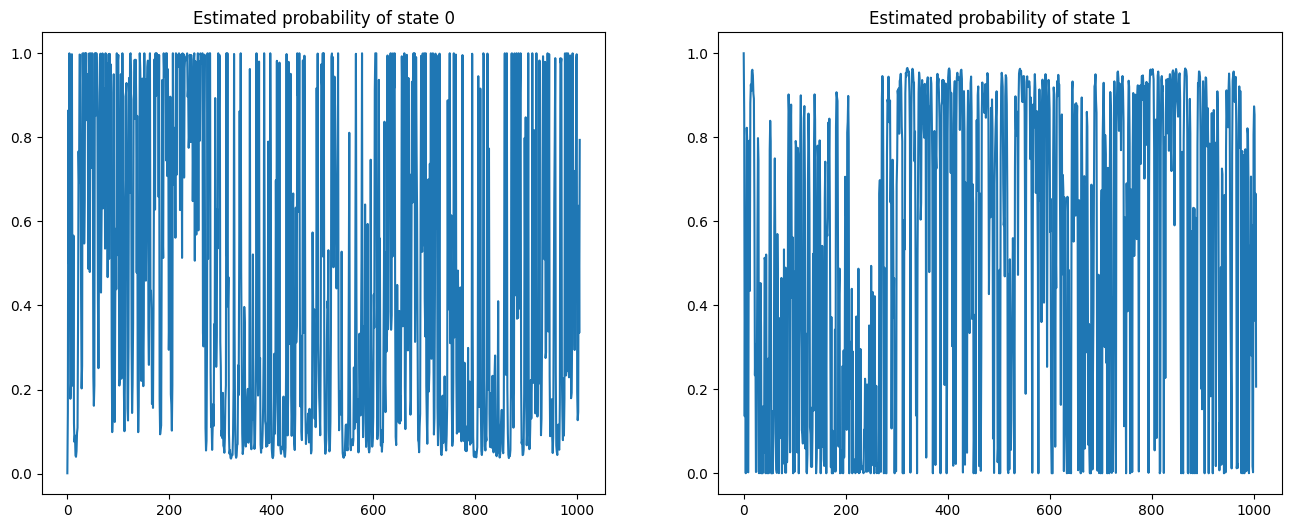


Iteration:  6
Diff:  -0.0022263672231471856
Log-Likelihood:  -1518.414 Change:  -0.0022
Final Estimates
Log-Likelihood:  -1518.414 Akaike:  3060.8281 Schwarz:  3119.7929
Mu:  [-2.5352 -0.914 ]
Sigma:  [1.2735 0.576 ]
Transition matrix: 
[0.7227 0.2773]
[0.2932 0.7068]
Initial probabilities: [0.0061 0.9939]


In [40]:
# Initialize parameters
T = len(df) # length of time-series
N = 2 # Number

# SET INITIAL GUESSES

mu_hat0 = [0, 0.1] * np.ones((N))         #expectation parameters of the distribution
sigma_hat0 = [0.5, 0.5] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.7
P_hat0[1, 0] = 1 - P_hat0[1, 1]

# Ster as initial probability the stationary distribution
pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

rho_hat0 = [0.1, 0.1]*np.ones((N))


# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200    #number of steps
itetol = 1e-4   #convergence tolerance parameter
log_like0 = -1e8
for ite in range(0, itemax):

    # Expectation step
    xi_prob_t, xi_prob_t1 = forward_alg_AR1(pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, rho_hat0, df)
    xi_prob_T = backward_alg(xi_prob_t, xi_prob_t1, N, T-1, P_hat0)

    print("")
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated probability of state 0")
    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated probability of state 1")
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.show()
    print("")

      # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T-1))
    for tt in range(1, T-1):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )

    # Instead of checking estimates we only check likelihood
    log_like1, akaike, schwarz = log_likelihood_AR1(np.concatenate(([pi_hat0], xi_prob_t1[0:T-2])),T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, rho_hat0, df)
    diff = (log_like1 - log_like0)/abs(log_like0 + 1e-3)
    print("Iteration: ", ite)
    print("Diff: ", diff)
    print("Log-Likelihood: ", np.round(log_like1, 4), "Change: ", np.round(diff,4))

    # Stop when the difference in likelihood between steps decreases

    if diff > itetol :
        # M-step
        mu_hat0, rh0_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func_AR1(xi_prob_T, P_hat_T, N, T, df)
        log_like0 = log_like1
    else:
        print("Final Estimates")
        print("Log-Likelihood: ", np.round(log_like1,4),
          "Akaike: ", np.round(akaike,4),
          "Schwarz: ", np.round(schwarz,4))
        print("Mu: ", np.round(mu_hat0,4))
        print("Sigma: ", np.round(sigma_hat0,4))
        print("Transition matrix: ")
        for ss in range(N):
            print(np.round(P_hat0[ss,:],4))
        print("Initial probabilities:", np.round(pi_hat0,4))
        break